# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Reading and processing the input data

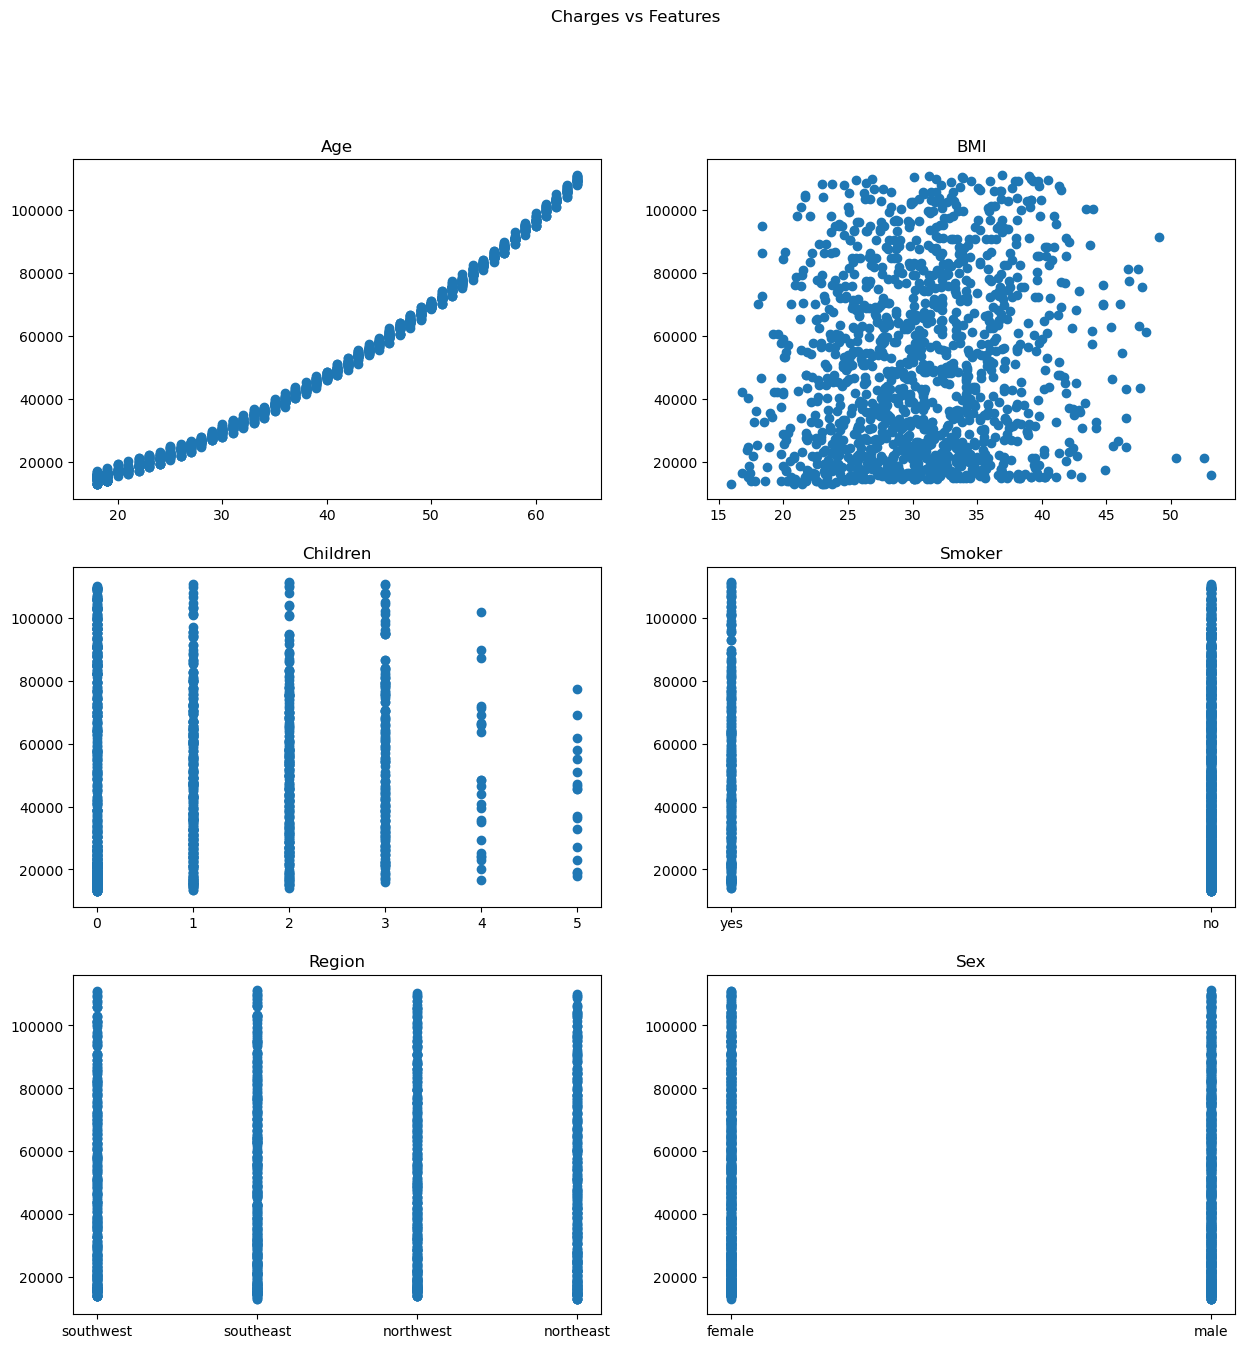

In [2]:
# Read data from insurance_charges.csv
df_X_train = pd.read_csv('insurance_charges.csv')

# Dataset Format
# age,sex,bmi,children,smoker,region,charges
# 19,female,27.9,0,yes,southwest,16420.0
# 18,male,33.77,1,no,southeast,15288.5
# 28,male,33.0,3,no,southeast,27750.0

# Plot charges against each feature in a single plot and multiple subplots to see the variation of charges with each feature
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Charges vs Features')
axs[0, 0].scatter(df_X_train['age'], df_X_train['charges'])
axs[0, 0].set_title('Age')
axs[0, 1].scatter(df_X_train['bmi'], df_X_train['charges'])
axs[0, 1].set_title('BMI')
axs[1, 0].scatter(df_X_train['children'], df_X_train['charges'])
axs[1, 0].set_title('Children')
axs[1, 1].scatter(df_X_train['smoker'], df_X_train['charges'])
axs[1, 1].set_title('Smoker')
axs[2, 0].scatter(df_X_train['region'], df_X_train['charges'])
axs[2, 0].set_title('Region')
axs[2, 1].scatter(df_X_train['sex'], df_X_train['charges'])
axs[2, 1].set_title('Sex')
plt.show()

In [3]:
# print average charges for smokers and non-smokers
print("="*50)
print("Average charges for smokers : ", df_X_train[df_X_train['smoker'] == 'yes']['charges'].mean())
print("Average charges for non-smokers : ", df_X_train[df_X_train['smoker'] == 'no']['charges'].mean())

# Print average charges for different age ranges
print("="*50)
print("Average charges for different age ranges:")
for age_range in [(0, 25), (25, 40), (40, 50), (50, 100)]:
    lower_bound, upper_bound = age_range
    print("Average charges for age range", age_range, ":", df_X_train[(df_X_train['age'] >= lower_bound) & (df_X_train['age'] < upper_bound)]['charges'].mean())
    
# Print average charges for different BMI ranges
print("="*50)
print("Average charges for different BMI ranges:")
for bmi_range in [(0, 18.5), (18.5, 24.9), (24.9, 29.9), (29.9, 34.9), (34.9, 100)]:
    lower_bound, upper_bound = bmi_range
    print("Average charges for BMI range", bmi_range, ":", df_X_train[(df_X_train['bmi'] >= lower_bound) & (df_X_train['bmi'] < upper_bound)]['charges'].mean())
    
# Print average charges for different regions
print("="*50)
print("Average charges for different regions:")
for region in df_X_train['region'].unique():
    print("Average charges for region", region, ":", df_X_train[df_X_train['region'] == region]['charges'].mean())

# Print average charges based on gender
print("="*50)
print("Average charges for males: ", df_X_train[df_X_train['sex'] == 'male']['charges'].mean())
print("Average charges for females: ", df_X_train[df_X_train['sex'] == 'female']['charges'].mean())

Average charges for smokers :  49781.45437956204
Average charges for non-smokers :  50611.31578947369
Average charges for different age ranges:
Average charges for age range (0, 25) : 17150.288669064747
Average charges for age range (25, 40) : 32938.68939393939
Average charges for age range (40, 50) : 57153.09856630825
Average charges for age range (50, 100) : 87619.07207792207
Average charges for different BMI ranges:
Average charges for BMI range (0, 18.5) : 36253.75
Average charges for BMI range (18.5, 24.9) : 44182.657657657655
Average charges for BMI range (24.9, 29.9) : 49243.97944297082
Average charges for BMI range (29.9, 34.9) : 51438.20676691729
Average charges for BMI range (34.9, 100) : 55837.83984375
Average charges for different regions:
Average charges for region southwest : 50873.73846153846
Average charges for region southeast : 50221.95054945055
Average charges for region northwest : 50303.911538461536
Average charges for region northeast : 50392.07484567901
Average c

In [4]:
print("Number of samples in the dataset: ", len(df_X_train))

Number of samples in the dataset:  1338


In [5]:
# Make data better by removing outliers
df_X_train = df_X_train[(np.abs(df_X_train['charges'] - df_X_train['charges'].mean()) / df_X_train['charges'].std() < 3)]
df_X_train = df_X_train[(np.abs(df_X_train['age'] - df_X_train['age'].mean()) / df_X_train['age'].std() < 3)]
df_X_train = df_X_train[(np.abs(df_X_train['bmi'] - df_X_train['bmi'].mean()) / df_X_train['bmi'].std() < 3)]
df_X_train = df_X_train[(np.abs(df_X_train['children'] - df_X_train['children'].mean()) / df_X_train['children'].std() < 3)]
print("Number of samples in the dataset: ", len(df_X_train))

# Drop useless column - 'region' and 'sex'
df_X_train = df_X_train.drop(['region','sex'], axis=1)

df_X_train.head(10)

Number of samples in the dataset:  1316


,age,bmi,children,smoker,charges
0,19,27.900,0,yes,16420.0
1,18,33.770,1,no,15288.5
2,28,33.000,3,no,27750.0
3,33,22.705,0,no,32225.0
4,32,28.880,0,no,32044.0
5,31,25.740,0,no,30312.0
6,46,33.440,1,no,60072.0
7,37,27.740,3,no,42112.0
8,37,29.830,2,no,41716.5
9,60,25.840,0,no,96292.0


In [6]:
# Convert categorical data to numerical data - 'smoker' by replacing 'yes' with 1 and 'no' with 0
df_X_train['smoker'] = df_X_train['smoker'].replace({'yes': 1, 'no': 0})
df_X_train.head(10)

,age,bmi,children,smoker,charges
0,19,27.900,0,1,16420.0
1,18,33.770,1,0,15288.5
2,28,33.000,3,0,27750.0
3,33,22.705,0,0,32225.0
4,32,28.880,0,0,32044.0
5,31,25.740,0,0,30312.0
6,46,33.440,1,0,60072.0
7,37,27.740,3,0,42112.0
8,37,29.830,2,0,41716.5
9,60,25.840,0,0,96292.0


In [7]:
# Separate charges from the rest of the data as df_Y_train
Y_train = df_X_train['charges']

# Drop 'charges' from df_X_train
df_X_train = df_X_train.drop(['charges'], axis=1)

In [8]:
# Split the data into training and validation sets
train_size = int(len(df_X_train) * 0.8)
X_valid = df_X_train[train_size:]
Y_valid = Y_train[train_size:]
X_train = df_X_train[:train_size]
Y_train = Y_train[:train_size]

##### Uncomment the code below to "RANDOMLY" split using from sklearn #####
# from sklearn.model_selection import train_test_split
# X_train, X_valid, Y_train, Y_valid = train_test_split(df_X_train, Y_train, test_size=0.2, random_state=42)

print("Number of samples in the training set: ", len(X_train))
print("Number of samples in the Validation set: ", len(X_valid))

Number of samples in the training set:  1052
Number of samples in the Validation set:  264


In [9]:
# Store the mean and standard deviation of the training and validation sets before normalizing
mean_X_train = X_train.mean()
std_X_train = X_train.std()
mean_X_valid = X_valid.mean()
std_X_valid = X_valid.std()

# Normalize the dataset
X_train = (X_train - X_train.mean()) / X_train.std()
X_valid = (X_valid - X_valid.mean()) / X_valid.std()
# Convert data to numpy arrays of type float
X_train_arr = X_train.to_numpy().astype(float)
X_valid_arr = X_valid.to_numpy().astype(float)
y_train_arr = Y_train.to_numpy().astype(float)
y_valid_arr = Y_valid.to_numpy().astype(float)

# Print shapes of the data
print("Shape of X_train: ", X_train_arr.shape)
print("Shape of y_train: ", y_train_arr.shape)
print("Shape of X_valid: ", X_valid_arr.shape)
print("Shape of y_valid: ", y_valid_arr.shape)

Shape of X_train:  (1052, 4)
Shape of y_train:  (1052,)
Shape of X_valid:  (264, 4)
Shape of y_valid:  (264,)


## Batch Gradient Descent

R2 Score on Training Set:  0.9792005329296775
R2 Score on Validation Set:  0.9633501152194648
RMSE on Training Set:  4112.03447556265
RMSE on Validation Set:  5257.04825761733


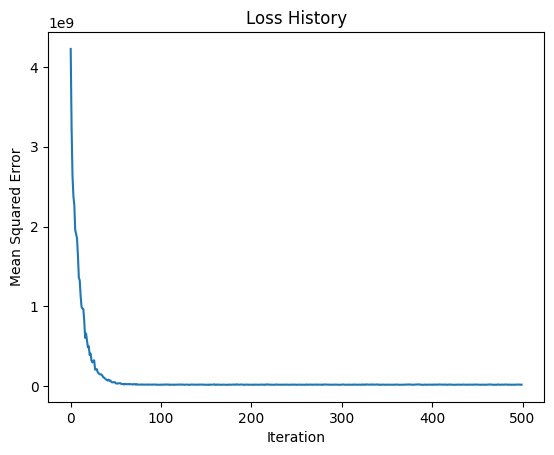

In [10]:
np.random.seed(1)
BATCH_SIZE = 200

def fit_linear_regression(X, y,learning_rate=0.0005, num_iterations=50000, batch_size=100):
    num_samples, num_features = X.shape
    loss_history = []
    
    # Initialize weights and bias
    weights = np.random.randn(num_features)
    bias = 0
    
    # Gradient descent
    for it in range(num_iterations):
        indices = np.random.choice(num_samples, batch_size)  # Select random indices for batch
        X_batch, y_batch = X[indices], y[indices]  # Create batch using selected indices
        
        # Predicted values
        y_pred = np.dot(X_batch, weights) + bias
        
        # Calculate gradients
        dw = (1/batch_size) * np.dot(X_batch.T, (y_pred - y_batch))
        db = (1/batch_size) * np.sum(y_pred - y_batch)
        
        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db
        
        # Calculate loss after every 100 iterations
        if it % 100 == 0:
            loss = (1/batch_size) * np.sum((y_pred - y_batch) ** 2)
            loss_history.append(loss)
    
    return weights, bias, loss_history

def predict_linear_regression(X, weights, bias):
    return np.dot(X, weights) + bias

# Fit the model on the training data
weights, bias, loss_history = fit_linear_regression(X_train_arr, y_train_arr, batch_size=BATCH_SIZE)

# Evaluate the model on the validation data
y_train_pred = predict_linear_regression(X_train_arr, weights, bias)
y_valid_pred = predict_linear_regression(X_valid_arr, weights, bias)

# Calculating R^2 on both training and validation data
y_mean = np.mean(y_train_arr)
r2_train = 1 - (np.sum((y_train_arr - y_train_pred) ** 2) / np.sum((y_train_arr - y_mean) ** 2))
r2_valid = 1 - (np.sum((y_valid_arr - y_valid_pred) ** 2) / np.sum((y_valid_arr - y_mean) ** 2))
print("R2 Score on Training Set: ", r2_train)
print("R2 Score on Validation Set: ", r2_valid)

# Calculating RMSE on both training and validation data
rmse_train = np.sqrt(np.mean((y_train_arr - y_train_pred) ** 2))
rmse_valid = np.sqrt(np.mean((y_valid_arr - y_valid_pred) ** 2))
print("RMSE on Training Set: ", rmse_train)
print("RMSE on Validation Set: ", rmse_valid)

# Plot the loss history
plt.plot(loss_history)
plt.title('Loss History')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.show()

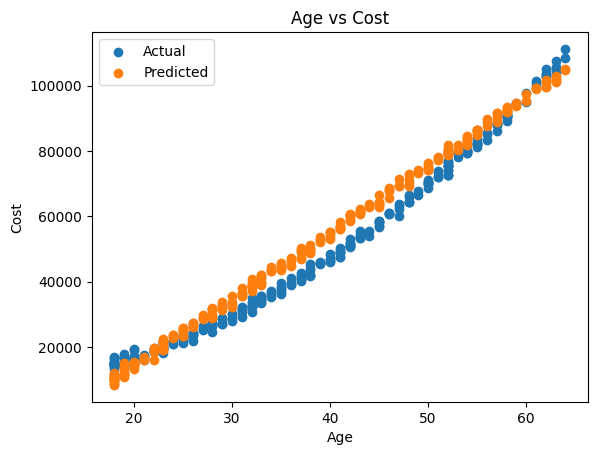

In [11]:
# Plotting actual vs predicted charges against age
import matplotlib.pyplot as plt
plt.scatter(X_valid_arr[:, 0]* std_X_valid['age'] + mean_X_valid['age'], y_valid_arr, label='Actual')
plt.scatter(X_valid_arr[:, 0]* std_X_valid['age'] + mean_X_valid['age'], y_valid_pred, label='Predicted')
plt.title("Age vs Cost")
plt.xlabel("Age")
plt.ylabel("Cost")
plt.legend()
plt.show()

In [12]:
# Feature importance analysis
feature_names = df_X_train.columns
feature_importances = weights
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

importance_df['abs_importance'] = importance_df['importance'].abs()

# Sort the importance dataframe using absolute importance
importance_df = importance_df.sort_values(by='abs_importance', ascending=False)

# Get percentage importance
importance_df['percentage_importance'] = (importance_df['abs_importance'] / importance_df['abs_importance'].sum()) * 100
# Comnvert to string and add percentage sign
importance_df['percentage_importance'] = importance_df['percentage_importance'].round(2).astype(str) + '%'

print("="*50)
print("Feature Importance Analysis")
print(importance_df)
print("="*50)

Feature Importance Analysis
    feature    importance  abs_importance percentage_importance
0       age  28164.250631    28164.250631                94.37%
2  children   -729.867402      729.867402                 2.45%
1       bmi    700.343379      700.343379                 2.35%
3    smoker    251.298060      251.298060                 0.84%


In [13]:
# # Uncomment the following code to use sklearn's Linear Regression model
# # Fitting sklearn's Linear Regression model to the data
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(X_train_arr, y_train_arr)
# y_train_pred = model.predict(X_train_arr)
# y_valid_pred = model.predict(X_valid_arr)

# # Calculating R^2 on both training and validation data
# y_mean = np.mean(y_train_arr)
# r2_train = 1 - (np.sum((y_train_arr - y_train_pred) ** 2) / np.sum((y_train_arr - y_mean) ** 2))
# r2_valid = 1 - (np.sum((y_valid_arr - y_valid_pred) ** 2) / np.sum((y_valid_arr - y_mean) ** 2))
# print("R2 Score on Training Set: ", r2_train)
# print("R2 Score on Validation Set: ", r2_valid)

# # Calculating RMSE on both training and validation data
# rmse_train = np.sqrt(np.mean((y_train_arr - y_train_pred) ** 2))
# rmse_valid = np.sqrt(np.mean((y_valid_arr - y_valid_pred) ** 2))
# print("RMSE on Training Set: ", rmse_train)
# print("RMSE on Validation Set: ", rmse_valid)

## Regularization In Batch Gradient Descent

R2 Score on Training Set:  0.9791995269087171
R2 Score on Validation Set:  0.9633673707881516
RMSE on Training Set:  4112.133919044478
RMSE on Validation Set:  5255.810545168625


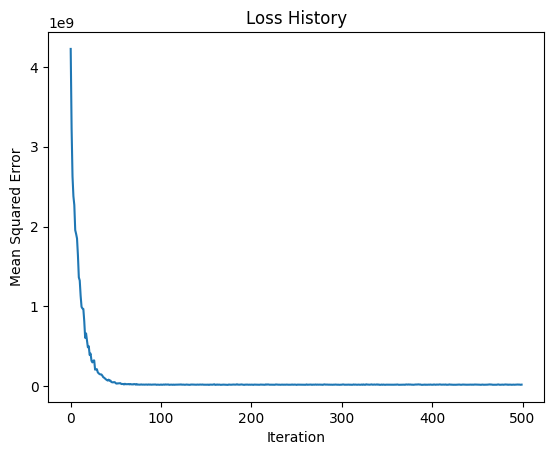

In [14]:
np.random.seed(1)
BATCH_SIZE = 200

def fit_linear_regression(X, y, learning_rate=0.0005, num_iterations=50000, batch_size=100, l1_ratio=0.1, alpha=0.0005):
    num_samples, num_features = X.shape
    loss_history = []
    
    # Initialize weights and bias
    weights = np.random.randn(num_features)
    bias = 0
    
    # Gradient descent
    for it in range(num_iterations):
        indices = np.random.choice(num_samples, batch_size)  # Select random indices for batch
        X_batch, y_batch = X[indices], y[indices]  # Create batch using selected indices
        
        # Predicted values
        y_pred = np.dot(X_batch, weights) + bias
        
        # Calculate gradients
        dw = (1/batch_size) * np.dot(X_batch.T, (y_pred - y_batch))
        db = (1/batch_size) * np.sum(y_pred - y_batch)
        
        # Elastic Net Regularization
        l1_regularization = l1_ratio * np.linalg.norm(weights, ord=1)
        l2_regularization = (1 - l1_ratio) * np.linalg.norm(weights, ord=2)
        dw += alpha * (l1_regularization + l2_regularization)
        
        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db
        
        # Calculate loss after every 100 iterations
        if it % 100 == 0:
            loss = (1/batch_size) * np.sum((y_pred - y_batch) ** 2)
            loss_history.append(loss)
    
    return weights, bias, loss_history

def predict_linear_regression(X, weights, bias):
    return np.dot(X, weights) + bias

# Fit the model on the training data
weights, bias, loss_history = fit_linear_regression(X_train_arr, y_train_arr, batch_size=BATCH_SIZE)  # Example with batch_size=200

# Evaluate the model on the validation data
y_train_pred = predict_linear_regression(X_train_arr, weights, bias)
y_valid_pred = predict_linear_regression(X_valid_arr, weights, bias)

# Calculating R^2 on both training and validation data
y_mean = np.mean(y_train_arr)
r2_train = 1 - (np.sum((y_train_arr - y_train_pred) ** 2) / np.sum((y_train_arr - y_mean) ** 2))
r2_valid = 1 - (np.sum((y_valid_arr - y_valid_pred) ** 2) / np.sum((y_valid_arr - y_mean) ** 2))
print("R2 Score on Training Set: ", r2_train)
print("R2 Score on Validation Set: ", r2_valid)

# Calculating RMSE on both training and validation data
rmse_train = np.sqrt(np.mean((y_train_arr - y_train_pred) ** 2))
rmse_valid = np.sqrt(np.mean((y_valid_arr - y_valid_pred) ** 2))
print("RMSE on Training Set: ", rmse_train)
print("RMSE on Validation Set: ", rmse_valid)

# Plot the loss history
plt.plot(loss_history)
plt.title('Loss History')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.show()

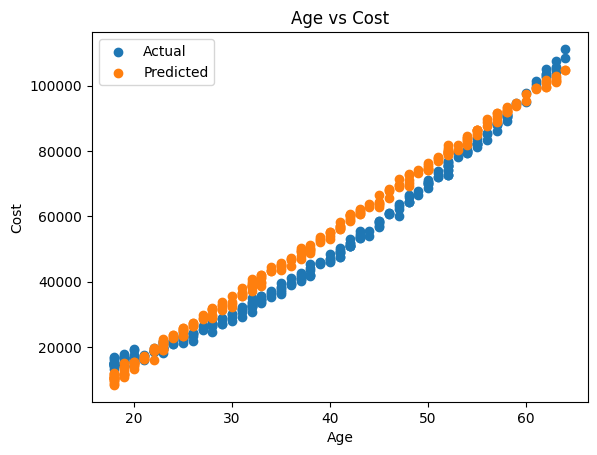

In [15]:
# Plotting actual vs predicted charges against age
import matplotlib.pyplot as plt
plt.scatter(X_valid_arr[:, 0]* std_X_valid['age'] + mean_X_valid['age'], y_valid_arr, label='Actual')
plt.scatter(X_valid_arr[:, 0]* std_X_valid['age'] + mean_X_valid['age'], y_valid_pred, label='Predicted')
plt.title("Age vs Cost")
plt.xlabel("Age")
plt.ylabel("Cost")
plt.legend()
plt.show()

In [16]:
# Feature importance analysis
feature_names = df_X_train.columns
feature_importances = weights
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

importance_df['abs_importance'] = importance_df['importance'].abs()

# Sort the importance dataframe using absolute importance
importance_df = importance_df.sort_values(by='abs_importance', ascending=False)

# Get percentage importance
importance_df['percentage_importance'] = (importance_df['abs_importance'] / importance_df['abs_importance'].sum()) * 100
# Comnvert to string and add percentage sign
importance_df['percentage_importance'] = importance_df['percentage_importance'].round(2).astype(str) + '%'

print("="*50)
print("Feature Importance Analysis")
print(importance_df)
print("="*50)

Feature Importance Analysis
    feature    importance  abs_importance percentage_importance
0       age  28152.149183    28152.149183                94.41%
2  children   -742.828919      742.828919                 2.49%
1       bmi    687.783573      687.783573                 2.31%
3    smoker    237.154122      237.154122                  0.8%


In [17]:
# # Uncomment the following code to use sklearn's Linear Regression model
# # Fitting sklearn's Linear Regression model with Elastic Net regularization to the data
# from sklearn.linear_model import ElasticNet
# model = ElasticNet(alpha=0.0005, l1_ratio=0.1)
# model.fit(X_train_arr, y_train_arr)
# y_train_pred = model.predict(X_train_arr)
# y_valid_pred = model.predict(X_valid_arr)

# # Calculating R^2 on both training and validation data
# y_mean = np.mean(y_train_arr)
# r2_train = 1 - (np.sum((y_train_arr - y_train_pred) ** 2) / np.sum((y_train_arr - y_mean) ** 2))
# r2_valid = 1 - (np.sum((y_valid_arr - y_valid_pred) ** 2) / np.sum((y_valid_arr - y_mean) ** 2))
# print("R2 Score on Training Set: ", r2_train)
# print("R2 Score on Validation Set: ", r2_valid)

# # Calculating RMSE on both training and validation data
# rmse_train = np.sqrt(np.mean((y_train_arr - y_train_pred) ** 2))
# rmse_valid = np.sqrt(np.mean((y_valid_arr - y_valid_pred) ** 2))
# print("RMSE on Training Set: ", rmse_train)
# print("RMSE on Validation Set: ", rmse_valid)

## Polynomial Regression

R2 Score on Training Set:  0.9945433490401467
R2 Score on Validation Set:  0.9804391621794795
RMSE on Training Set:  2106.1714949497996
RMSE on Validation Set:  3840.602701243301


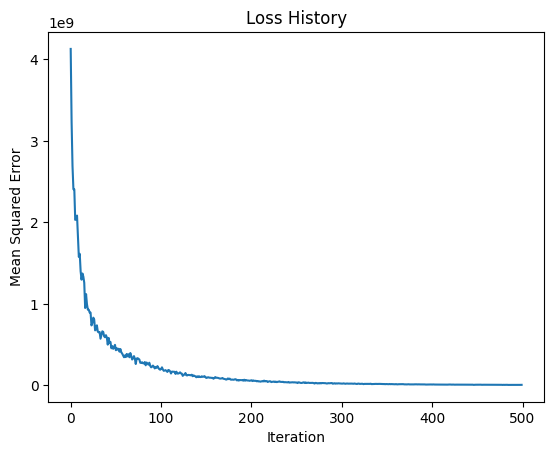

In [18]:
degree_poly = 2

# Here instead of considering all possible combinations of features up to the specified degree,
# we will only consider the polynomial features up to the specified degree for each feature separately.
# Use sklearn's PolynomialFeatures to generate polynomial features of all possible combinations.
def polynomial_features(X, degree):
    # Initialize new feature array with ones
    new_X = np.ones((X.shape[0], 1))
    # Create polynomial features up to the specified degree
    for d in range(1, degree + 1):
        new_X = np.hstack([new_X, X ** d])
    return new_X
# Transform the features to polynomial features
X_train_poly = polynomial_features(X_train_arr, degree_poly)
X_valid_poly = polynomial_features(X_valid_arr, degree_poly)
# Example
# 1       1       1       1 -> np.ones(X.shape[0],1)
# x1      x2      x3      x4 -> for d = 1
# x1^2    x2^2    x3^2    x4^2 -> for d = 2
# x1^3    x2^3    x3^3    x4^3 -> for d = 3

#### Uncomment the code below to use sklearn's PolynomialFeatures ####
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=degree_poly)
# X_train_poly = poly.fit_transform(X_train_arr)
# X_valid_poly = poly.fit_transform(X_valid_arr)

np.random.seed(1)
BATCH_SIZE = 200

def fit_linear_regression(X, y,learning_rate=0.0001, num_iterations=50000, batch_size=100):
    num_samples, num_features = X.shape
    loss_history = []
    
    # Initialize weights and bias
    weights = np.random.randn(num_features)
    bias = 0
    
    # Gradient descent
    for it in range(num_iterations):
        indices = np.random.choice(num_samples, batch_size)  # Select random indices for batch
        X_batch, y_batch = X[indices], y[indices]  # Create batch using selected indices
        
        # Predicted values
        y_pred = np.dot(X_batch, weights) + bias
        
        # Calculate gradients
        dw = (1/batch_size) * np.dot(X_batch.T, (y_pred - y_batch))
        db = (1/batch_size) * np.sum(y_pred - y_batch)
        
        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db
        
        # Calculate loss after every 100 iterations
        if it % 100 == 0:
            loss = (1/batch_size) * np.sum((y_pred - y_batch) ** 2)
            loss_history.append(loss)
    
    return weights, bias, loss_history

def predict_linear_regression(X, weights, bias):
    return np.dot(X, weights) + bias

# Fit the model on the training data
weights, bias, loss_history = fit_linear_regression(X_train_poly, y_train_arr, batch_size=BATCH_SIZE)

# Evaluate the model on the validation data
y_train_pred = predict_linear_regression(X_train_poly, weights, bias)
y_valid_pred = predict_linear_regression(X_valid_poly, weights, bias)

# Calculating R^2 on both training and validation data
y_mean = np.mean(y_train_arr)
r2_train = 1 - (np.sum((y_train_arr - y_train_pred) ** 2) / np.sum((y_train_arr - y_mean) ** 2))
r2_valid = 1 - (np.sum((y_valid_arr - y_valid_pred) ** 2) / np.sum((y_valid_arr - y_mean) ** 2))
print("R2 Score on Training Set: ", r2_train)
print("R2 Score on Validation Set: ", r2_valid)

# Calculating RMSE on both training and validation data
rmse_train = np.sqrt(np.mean((y_train_arr - y_train_pred) ** 2))
rmse_valid = np.sqrt(np.mean((y_valid_arr - y_valid_pred) ** 2))
print("RMSE on Training Set: ", rmse_train)
print("RMSE on Validation Set: ", rmse_valid)

# Plot the loss history
plt.plot(loss_history)
plt.title('Loss History')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.show()

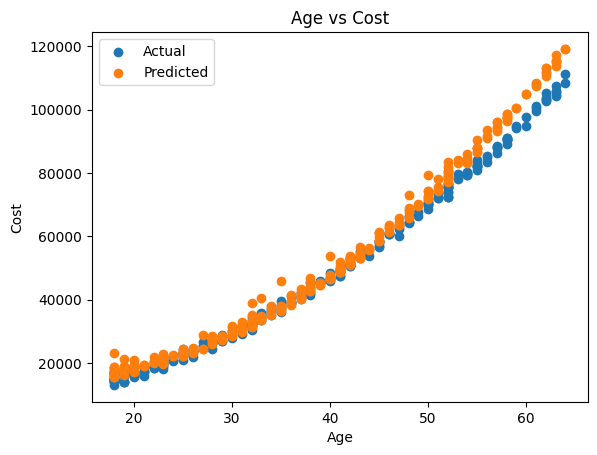

In [19]:
# Plotting actual vs predicted charges against age
import matplotlib.pyplot as plt
plt.scatter(X_valid_arr[:, 0]* std_X_valid['age'] + mean_X_valid['age'], y_valid_arr, label='Actual')
plt.scatter(X_valid_arr[:, 0]* std_X_valid['age'] + mean_X_valid['age'], y_valid_pred, label='Predicted')
plt.title("Age vs Cost")
plt.xlabel("Age")
plt.ylabel("Cost")
plt.legend()
plt.show()

In [20]:
### Feature importance analysis ###
feature_names = []
for d in range(1, degree_poly + 1):
    for feature in df_X_train.columns:
        feature_names.append(f"{feature}^{d}")

feature_importances = weights[1:] # Remove the bias term

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

importance_df['abs_importance'] = importance_df['importance'].abs()

# Group feature importances by category
importance_df['degree'] = importance_df['feature'].str.split('^').str[1].astype(int)

# Sort the grouped importance dataframe
importance_df = importance_df.sort_values(by='abs_importance', key=abs, ascending=False)

# Get percentage importance
importance_df['percentage_importance'] = (importance_df['abs_importance'] / importance_df['abs_importance'].sum()) * 100
importance_df['percentage_importance'] = importance_df['percentage_importance'].round(2).astype(str) + '%'

# Sort the grouped importance dataframe
importance_df = importance_df.sort_values(by=['degree', 'abs_importance'], ascending=[True, False])

print("="*50)
print("Feature Importance Analysis")
print(importance_df)
print("="*50)

Feature Importance Analysis
      feature    importance  abs_importance  degree percentage_importance
0       age^1  27793.468036    27793.468036       1                54.52%
3    smoker^1  -8213.636966     8213.636966       1                16.11%
1       bmi^1    478.118997      478.118997       1                 0.94%
2  children^1   -320.816711      320.816711       1                 0.63%
4       age^2   6392.700389     6392.700389       2                12.54%
7    smoker^2   6101.135839     6101.135839       2                11.97%
6  children^2   1290.575202     1290.575202       2                 2.53%
5       bmi^2    384.229641      384.229641       2                 0.75%


In [21]:
# # Uncomment the following code to use sklearn's Linear Regression model
# # Fitting sklearn's Polynomial Regression model
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression

# poly = PolynomialFeatures(degree=2)
# X_train_poly = poly.fit_transform(X_train_arr)
# X_valid_poly = poly.transform(X_valid_arr)  

# model = LinearRegression()
# model.fit(X_train_poly, y_train_arr)

# y_train_pred = model.predict(X_train_poly)
# y_valid_pred = model.predict(X_valid_poly)

# # Calculating R^2 on both training and validation data
# y_mean = np.mean(y_train_arr)
# r2_train = 1 - (np.sum((y_train_arr - y_train_pred) ** 2) / np.sum((y_train_arr - y_mean) ** 2))
# r2_valid = 1 - (np.sum((y_valid_arr - y_valid_pred) ** 2) / np.sum((y_valid_arr - y_mean) ** 2))
# print("R2 Score on Training Set: ", r2_train)
# print("R2 Score on Validation Set: ", r2_valid)

# # Calculating RMSE on both training and validation data
# rmse_train = np.sqrt(np.mean((y_train_arr - y_train_pred) ** 2))
# rmse_valid = np.sqrt(np.mean((y_valid_arr - y_valid_pred) ** 2))
# print("RMSE on Training Set: ", rmse_train)
# print("RMSE on Validation Set: ", rmse_valid)

## Polynomial Regression with Regularization

R2 Score on Training Set:  0.9946004598012179
R2 Score on Validation Set:  0.9808117397556938
RMSE on Training Set:  2095.120627882956
RMSE on Validation Set:  3803.8506492664014


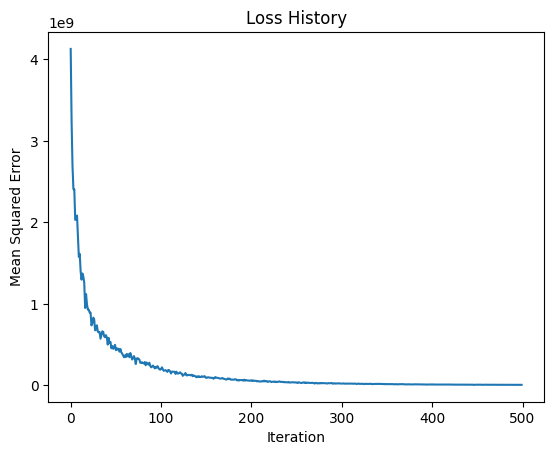

In [22]:
degree_poly = 2

# NOTE - The effect of regularization may not visible here as the model is simple.
# This is because we're NOT considering all possible polynomial combinations of features.
# Use sklearn's PolynomialFeatures to generate polynomial features of all possible combinations.
def polynomial_features(X, degree):
    # Initialize new feature array with ones
    new_X = np.ones((X.shape[0], 1))
    # Create polynomial features up to the specified degree
    for d in range(1, degree + 1):
        new_X = np.hstack([new_X, X ** d])
    return new_X
# Transform the features to polynomial features
X_train_poly = polynomial_features(X_train_arr, degree_poly)
X_valid_poly = polynomial_features(X_valid_arr, degree_poly)
# Example
# 1       1       1       1 -> np.ones(X.shape[0],1)
# x1      x2      x3      x4 -> for d = 1
# x1^2    x2^2    x3^2    x4^2 -> for d = 2
# x1^3    x2^3    x3^3    x4^3 -> for d = 3

#### Uncomment the code below to use sklearn's PolynomialFeatures ####
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=degree_poly)
# X_train_poly = poly.fit_transform(X_train_arr)
# X_valid_poly = poly.fit_transform(X_valid_arr)

np.random.seed(1)
BATCH_SIZE = 200

def fit_linear_regression(X, y, learning_rate=0.0001, num_iterations=50000, batch_size=100, l1_ratio=0.1, alpha=0.001):
    num_samples, num_features = X.shape
    loss_history = []
    
    # Initialize weights and bias
    weights = np.random.randn(num_features)
    bias = 0
    
    # Gradient descent
    for it in range(num_iterations):
        indices = np.random.choice(num_samples, batch_size)  # Select random indices for batch
        X_batch, y_batch = X[indices], y[indices]  # Create batch using selected indices
        
        # Predicted values
        y_pred = np.dot(X_batch, weights) + bias
        
        # Calculate gradients
        dw = (1/batch_size) * np.dot(X_batch.T, (y_pred - y_batch))
        db = (1/batch_size) * np.sum(y_pred - y_batch)
        
        # Elastic Net Regularization
        l1_regularization = l1_ratio * np.linalg.norm(weights, ord=1)
        l2_regularization = (1 - l1_ratio) * np.linalg.norm(weights, ord=2)
        dw += alpha * (l1_regularization + l2_regularization)
        
        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db
        
        # Calculate loss after every 100 iterations
        if it % 100 == 0:
            loss = (1/batch_size) * np.sum((y_pred - y_batch) ** 2)
            loss_history.append(loss)
    
    return weights, bias, loss_history


def predict_linear_regression(X, weights, bias):
    return np.dot(X, weights) + bias

# Fit the model on the training data
weights, bias, loss_history = fit_linear_regression(X_train_poly, y_train_arr, batch_size=BATCH_SIZE)

# Evaluate the model on the validation data
y_train_pred = predict_linear_regression(X_train_poly, weights, bias)
y_valid_pred = predict_linear_regression(X_valid_poly, weights, bias)

# Calculating R^2 on both training and validation data
y_mean = np.mean(y_train_arr)
r2_train = 1 - (np.sum((y_train_arr - y_train_pred) ** 2) / np.sum((y_train_arr - y_mean) ** 2))
r2_valid = 1 - (np.sum((y_valid_arr - y_valid_pred) ** 2) / np.sum((y_valid_arr - y_mean) ** 2))
print("R2 Score on Training Set: ", r2_train)
print("R2 Score on Validation Set: ", r2_valid)

# Calculating RMSE on both training and validation data
rmse_train = np.sqrt(np.mean((y_train_arr - y_train_pred) ** 2))
rmse_valid = np.sqrt(np.mean((y_valid_arr - y_valid_pred) ** 2))
print("RMSE on Training Set: ", rmse_train)
print("RMSE on Validation Set: ", rmse_valid)

# Plot the loss history
plt.plot(loss_history)
plt.title('Loss History')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.show()

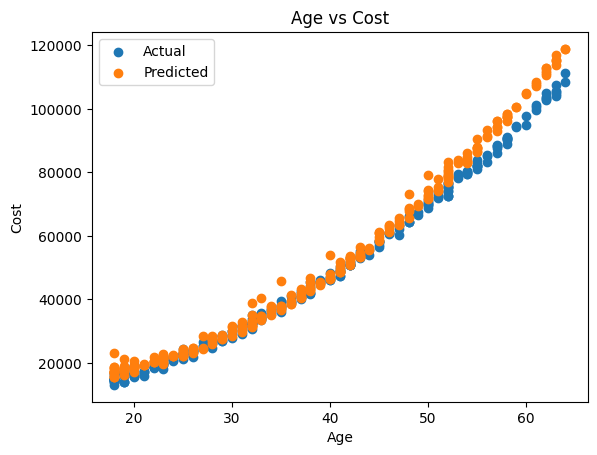

In [23]:
# Plotting actual vs predicted charges against age
import matplotlib.pyplot as plt
plt.scatter(X_valid_arr[:, 0]* std_X_valid['age'] + mean_X_valid['age'], y_valid_arr, label='Actual')
plt.scatter(X_valid_arr[:, 0]* std_X_valid['age'] + mean_X_valid['age'], y_valid_pred, label='Predicted')
plt.title("Age vs Cost")
plt.xlabel("Age")
plt.ylabel("Cost")
plt.legend()
plt.show()

In [24]:
### Feature importance analysis ###
feature_names = []
for d in range(1, degree_poly + 1):
    for feature in df_X_train.columns:
        feature_names.append(f"{feature}^{d}")

feature_importances = weights[1:] # Remove the bias term

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

importance_df['abs_importance'] = importance_df['importance'].abs()

# Group feature importances by category
importance_df['degree'] = importance_df['feature'].str.split('^').str[1].astype(int)

# Sort the grouped importance dataframe
importance_df = importance_df.sort_values(by='abs_importance', key=abs, ascending=False)

# Get percentage importance
importance_df['percentage_importance'] = (importance_df['abs_importance'] / importance_df['abs_importance'].sum()) * 100
importance_df['percentage_importance'] = importance_df['percentage_importance'].round(2).astype(str) + '%'

# Sort the grouped importance dataframe
importance_df = importance_df.sort_values(by=['degree', 'abs_importance'], ascending=[True, False])

print("="*50)
print("Feature Importance Analysis")
print(importance_df)
print("="*50)

Feature Importance Analysis
      feature    importance  abs_importance  degree percentage_importance
0       age^1  27761.731443    27761.731443       1                 54.4%
3    smoker^1  -8292.795938     8292.795938       1                16.25%
1       bmi^1    447.334909      447.334909       1                 0.88%
2  children^1   -368.563842      368.563842       1                 0.72%
4       age^2   6352.543587     6352.543587       2                12.45%
7    smoker^2   6139.169699     6139.169699       2                12.03%
6  children^2   1298.414566     1298.414566       2                 2.54%
5       bmi^2    374.646967      374.646967       2                 0.73%


In [25]:
# # Uncomment the following code to use sklearn's Linear Regression model
# # Fitting sklearn's Polynomial Regression model with Elastic Net regularization to the data
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import ElasticNet

# poly = PolynomialFeatures(degree=2)
# X_train_poly = poly.fit_transform(X_train_arr)
# X_valid_poly = poly.transform(X_valid_arr)

# model = ElasticNet(alpha=0.01, l1_ratio=0.1, max_iter=10000)

# model.fit(X_train_poly, y_train_arr)

# y_train_pred = model.predict(X_train_poly)
# y_valid_pred = model.predict(X_valid_poly)

# # Calculating R^2 on both training and validation data
# y_mean = np.mean(y_train_arr)
# r2_train = 1 - (np.sum((y_train_arr - y_train_pred) ** 2) / np.sum((y_train_arr - y_mean) ** 2))
# r2_valid = 1 - (np.sum((y_valid_arr - y_valid_pred) ** 2) / np.sum((y_valid_arr - y_mean) ** 2))
# print("R2 Score on Training Set: ", r2_train)
# print("R2 Score on Validation Set: ", r2_valid)

# # Calculating RMSE on both training and validation data
# rmse_train = np.sqrt(np.mean((y_train_arr - y_train_pred) ** 2))
# rmse_valid = np.sqrt(np.mean((y_valid_arr - y_valid_pred) ** 2))
# print("RMSE on Training Set: ", rmse_train)
# print("RMSE on Validation Set: ", rmse_valid)

# Understanding Effect of Regularization Now

In [26]:
# In the above polynomial regression model, we haven't considered all possible combinations of features up to the specified degree

In [27]:
# Here we are using PolynomialFeatures to transform the features to polynomial features
# It contains all possible combinations of features up to the specified degree
# Example -> Input features are [a, b], Degree-2, Polynomial features are [1, a, b, a^2, ab, b^2]

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train_arr)
X_valid_poly = poly.transform(X_valid_arr)  

model = LinearRegression()
model.fit(X_train_poly, y_train_arr)

y_train_pred = model.predict(X_train_poly)
y_valid_pred = model.predict(X_valid_poly)

print("Check for overfitting below (because of high degree polynomial features)...\n")
# Calculating R^2 on both training and validation data
y_mean = np.mean(y_train_arr)
r2_train = 1 - (np.sum((y_train_arr - y_train_pred) ** 2) / np.sum((y_train_arr - y_mean) ** 2))
r2_valid = 1 - (np.sum((y_valid_arr - y_valid_pred) ** 2) / np.sum((y_valid_arr - y_mean) ** 2))
print("R2 Score on Training Set: ", r2_train)
print("R2 Score on Validation Set: ", r2_valid)

# Calculating RMSE on both training and validation data
rmse_train = np.sqrt(np.mean((y_train_arr - y_train_pred) ** 2))
rmse_valid = np.sqrt(np.mean((y_valid_arr - y_valid_pred) ** 2))
print("RMSE on Training Set: ", rmse_train)
print("RMSE on Validation Set: ", rmse_valid)

Check for overfitting below (because of high degree polynomial features)...

R2 Score on Training Set:  0.9999368892801747
R2 Score on Validation Set:  -1.2506242134567227e+20
RMSE on Training Set:  226.50730364374832
RMSE on Validation Set:  307092403350188.0


In [28]:

# Now we will use ElasticNet model with PolynomialFeatures to transform the features to polynomial features
# It penalizes the model using both L1 and L2 regularization and reduces overfitting
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet

poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train_arr)
X_valid_poly = poly.transform(X_valid_arr)

model = ElasticNet(alpha=0.01, l1_ratio=0.1, max_iter=10000)

model.fit(X_train_poly, y_train_arr)

y_train_pred = model.predict(X_train_poly)
y_valid_pred = model.predict(X_valid_poly)

print("Check is the overfitting problem is resolved below (because of regularization)...\n")
# Calculating R^2 on both training and validation data
y_mean = np.mean(y_train_arr)
r2_train = 1 - (np.sum((y_train_arr - y_train_pred) ** 2) / np.sum((y_train_arr - y_mean) ** 2))
r2_valid = 1 - (np.sum((y_valid_arr - y_valid_pred) ** 2) / np.sum((y_valid_arr - y_mean) ** 2))
print("R2 Score on Training Set: ", r2_train)
print("R2 Score on Validation Set: ", r2_valid)

# Calculating RMSE on both training and validation data
rmse_train = np.sqrt(np.mean((y_train_arr - y_train_pred) ** 2))
rmse_valid = np.sqrt(np.mean((y_valid_arr - y_valid_pred) ** 2))
print("RMSE on Training Set: ", rmse_train)
print("RMSE on Validation Set: ", rmse_valid)

Check is the overfitting problem is resolved below (because of regularization)...

R2 Score on Training Set:  0.9994404468659309
R2 Score on Validation Set:  0.979986944261612
RMSE on Training Set:  674.4524081944983
RMSE on Validation Set:  3884.743595114996
